Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#read in the data with read_csv() into a pandas dataframe
housing_df = pd.read_csv('housing.csv')

#use .info() to show the feature in your dataset along with a count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Data visualizations to see relationship of the target variable with other features

Text(0.5, 0, 'House values')

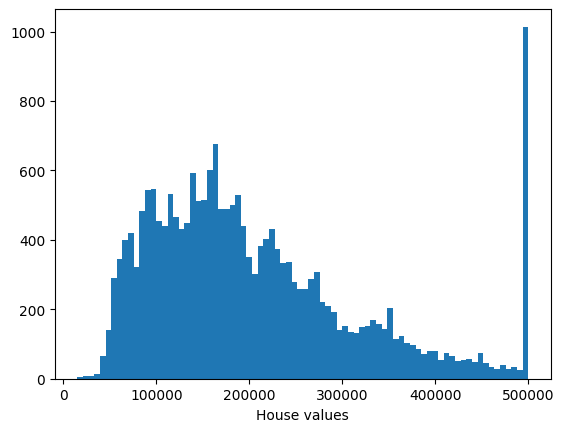

In [ ]:
#plot teh distribution of the target variable using a histogram
#bins = amount of columns

plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

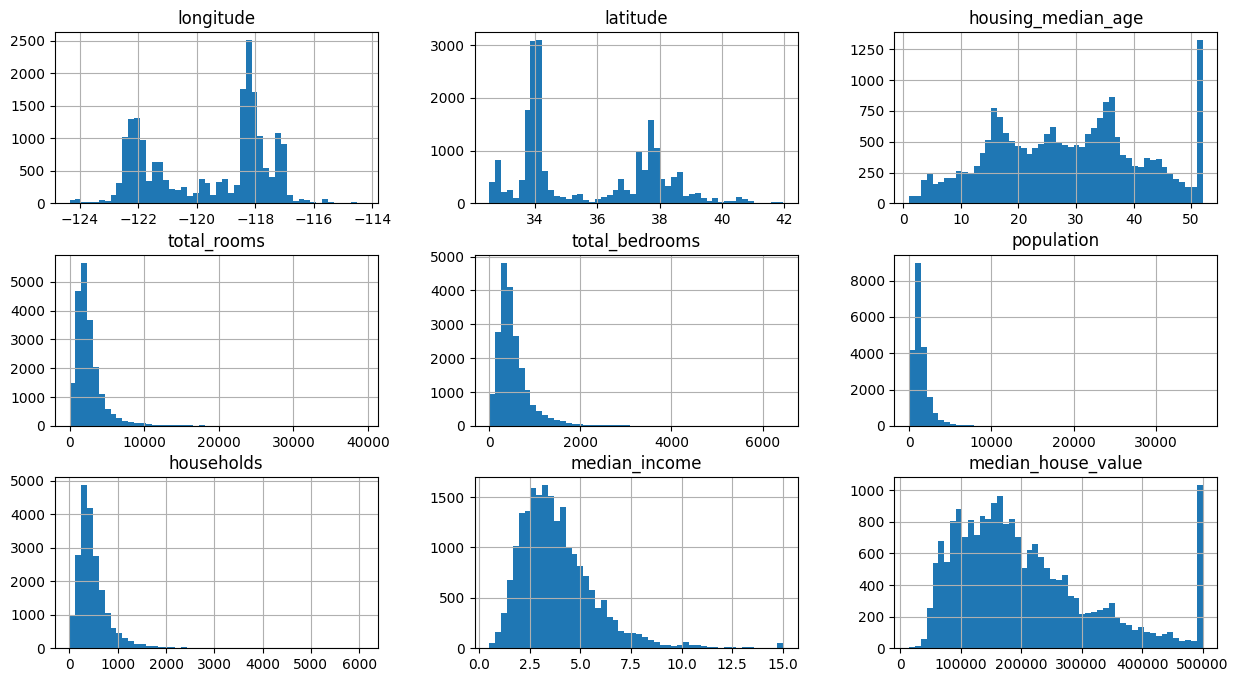

In [ ]:
housing_df.hist(bins=50, figsize=(15,8))

Using a heatmap to show correlation

In [ ]:
corr = housing_df.corr() # data frame correlation function
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<ipython-input-6-68dfa24ced17>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_df.corr() # data frame correlation function


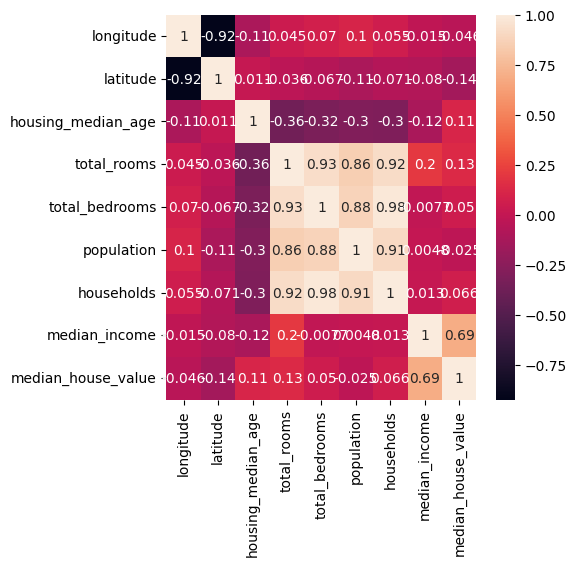

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)
plt.show()

## **Prepare and Preprocess data**

Finding missing data

In [ ]:
#verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#calculate the percentage of the missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

1.002906976744186

impute missing data using machine learning

In [ ]:
from sklearn.impute import KNNImputer

#create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

#retrieve columns with numerical data: will exclude the ocean-proximity column since the datatype is objetc
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype!='object']

#extract columns that contain at least one missing valus
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

#update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [ ]:
#initialize knnimputer to impute missing data using ml
knn = KNNImputer(n_neighbors = 3)

#fit function trains the model
knn.fit(housing_df_temp)

#transform the dta using the model
#applies the transformation model(ie; knn) to data
array_Values = knn.transform(housing_df_temp)

#convert the array values to a dataframe with the approriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

Feature Engineering

In [ ]:
# a new feature that is a ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# a new feature that is a ratio of the total bedrooms to total rooms
housing_df['bedrooms_per_rooms'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to households
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

# a new feature that is a ratio of the total rooms to households
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_rooms        20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [ ]:
#remove those features
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_rooms        20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


Heatmap after removing correlation

<ipython-input-16-1399863c29ce>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing_df.corr()


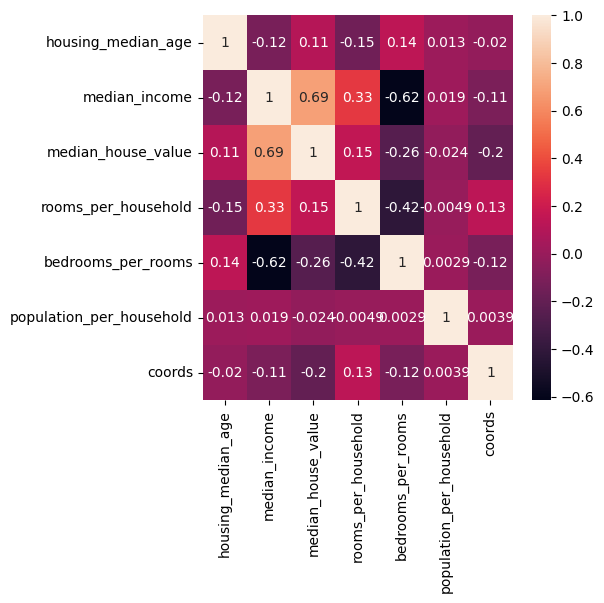

In [ ]:
corr = housing_df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)
plt.show()

ENCODING CATEGORICAL DATA

In [ ]:
#unique categories of ocean
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [ ]:
#replace the ocean_proximity column using get_dummies()
h_df_encodeed = pd.get_dummies(data= housing_df, columns=['ocean_proximity'])